<a href="https://colab.research.google.com/github/DevanshParmar/ICG-Summer-Program-2021-DS/blob/main/Convolutional_Neural_Network_on_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Network on Fashion MNIST Dataset**
This is a CNN Sequential Model implementation on the Fashion MNIST dataset. The code blocks which I played with and weren't effective have been deleted, and also the error-detection code sections, such as print(), type() etc. Hence the code has shortened to effectively about 100 lines.

#### **Uploads**
Setting up libraries and importing dataset files.
1. In the first block, we've imported the libraries, model, layers, optimizer and the data.
2. In the scond block we've loaded the data onto the training and testing dataset.
3. Finally, we've split the training dataset into training and validation datasets, on an 80:20 ratio.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.datasets import fashion_mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert Y_train.shape == (60000,)
assert Y_test.shape == (10000,)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2)
X_train.shape[0]

48000

#### **Modeling**
In the next blocks, we train our neural network.
1. The first block defines the batch size and the number of epochs over which the model would be trained. After that, the data is reshaped into the required shape.
2. The second block defines the sequential CNN model, with various convolutional, normalizing and pooling layers, along with flattening, densing and dropout layers.
3. The third block compiles, runs, and trains the neural network.


In [4]:
im_rows = 28
im_cols = 28
n_batch_size = 500
n_epochs = 50
im_shape = (im_rows, im_cols, 1)

X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)
X_validate = X_validate.reshape(X_validate.shape[0], *im_shape)

In [5]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, input_shape=im_shape, activation='relu'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=4),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [6]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.00095),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnnm = cnn_model.fit(
    X_train, Y_train, batch_size=n_batch_size,
    epochs=n_epochs, verbose=1,
    validation_data = (X_validate, Y_validate),
)

Epoch 1/50
96/96 [==============================] - 52s 47ms/step - loss: 1.0039 - accuracy: 0.6725 - val_loss: 0.3720 - val_accuracy: 0.8686
Epoch 2/50
96/96 [==============================] - 4s 37ms/step - loss: 0.4177 - accuracy: 0.8491 - val_loss: 0.3048 - val_accuracy: 0.8917
Epoch 3/50
96/96 [==============================] - 4s 37ms/step - loss: 0.3438 - accuracy: 0.8731 - val_loss: 0.2691 - val_accuracy: 0.9039
Epoch 4/50
96/96 [==============================] - 4s 37ms/step - loss: 0.3081 - accuracy: 0.8868 - val_loss: 0.2614 - val_accuracy: 0.9071
Epoch 5/50
96/96 [==============================] - 4s 37ms/step - loss: 0.2854 - accuracy: 0.8926 - val_loss: 0.2460 - val_accuracy: 0.9128
Epoch 6/50
96/96 [==============================] - 4s 37ms/step - loss: 0.2638 - accuracy: 0.9014 - val_loss: 0.2313 - val_accuracy: 0.9156
Epoch 7/50
96/96 [==============================] - 4s 37ms/step - loss: 0.2408 - accuracy: 0.9103 - val_loss: 0.2368 - val_accuracy: 0.9153
Epoch 8/50
9

#### **Predictions and Accuracy**
In the next block, we have the loss and accuracy over the training and validation datasets.

In [7]:
loss_train = cnnm.history['loss']
loss_valid = cnnm.history['val_loss']
accu_train = [100*i for i in cnnm.history['accuracy']]
accu_valid = [100*i for i in cnnm.history['val_accuracy']]

epochs = range(1, 1+n_epochs)

print('              Training Loss is {:.4f}'.format(loss_train[-1]))
print('            Validation Loss is {:.4f}'.format(loss_valid[-1]))
print(' ')
print('          Training Accuracy is {:.2f}%'.format(accu_train[-1]))
print('        Validation Accuracy is {:.2f}%'.format(accu_valid[-1]))
print(' ')
print('  Maximum Training Accuracy is {:.2f}%'.format(max(accu_train)))
print('Maximum Validation Accuracy is {:.2f}%'.format(max(accu_valid)))

              Training Loss is 0.0617
            Validation Loss is 0.2543
 
          Training Accuracy is 97.69%
        Validation Accuracy is 93.49%
 
  Maximum Training Accuracy is 97.69%
Maximum Validation Accuracy is 93.78%


#### **Plots**
Two plots are plotted as following:
1. Training and Validation loss, shown w.r.t. epochs.
2. Training and Validation accuracy, shown w.r.t. epochs.

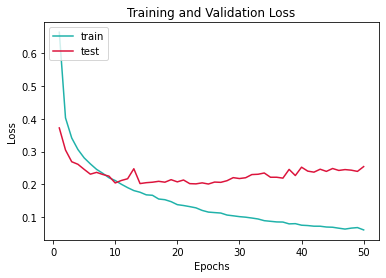

In [8]:
plt.plot(epochs, loss_train, color='lightseagreen', label='Training Loss')
plt.plot(epochs, loss_valid, color='crimson', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

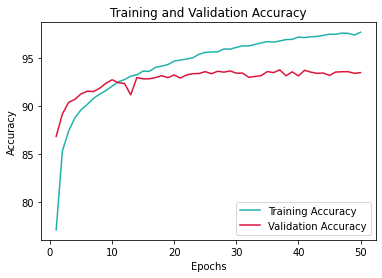

In [9]:
plt.plot(epochs, accu_train, color='lightseagreen', label='Training Accuracy')
plt.plot(epochs, accu_valid, color='crimson', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It shows that our model has training set accuracy of around 97.5% and validation set accuracy of around 93.5%. Hence it is overfitting by around 4%. I don't have enough time to work on it, hence leaving it as is.

#### **References and Acknowledgements**
1. Deeplizard YouTube channel's playlist on Neural Networks was a great help: www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU\n
2. Mark Jay's YouTube videos also assisted: www.youtube.com/playlist?list=PLX-LrBk6h3wR27xylD3Rsx4bbA15jlcYC
3. For getting a hang of layers, I studied from this model: https://colab.research.google.com/github/timlovescoding/FASHION-MNIST/blob/master/Tim_Fashion_MNIST.ipynb
4. For plotting the output, I studied from this site: www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib
5. My friends helped me greatly during this assignment. Sincere thanks to Yatish Goel, Atharv Singh Patlan, Shiven Tripathi and Ananya Gupta among others.